## <span style='color:Blue'> Parte II<span>

### 1. Presentación del problema de predicción que se desea realizar. Defina claramente qué datos utilizara, cuál es su variable target y cuáles sus predictores. 

El problema consiste en predecir mayores índices de depresión en la población adulta mediante la identificación de las variables que contribuyen con una mayor vulnerabilidad ante los desórdenes depresivos. Para esto, se utilizará la información estadística proveniente de la Encuesta Demográfica y de Salud Familiar (ENDES) para los años 2020 y 2021, la cual incluye información que permite medir el padecimiento de 9 síntomas asociados a desórdenes de depresión. Para cada año se hará uso de los módulos de vivienda, antecedentes individuales y salud correspondientes a los cuestionarios del hogar, individual y salud respectivamente.

La variable dependiente representa un **puntaje de síntomas de depresión en los últimos 14 días**, construido a partir de 9 preguntas que miden diferentes dimensiones de dicho fenómeno. Las variables predictores abarcan desde los indicadores sociales vinculados a la condición de la vivienda, como acceso a servicios básicos (agua, luz, desagüe); antecedentes de la persona entrevistada, como sexo, edad, grado de educación alcanzado, identificación étnica, región donde vive; hasta la condición, hábitos y cuidados de salud, como presencia de enfermedades crónicas, infecciosas, consumo de cigarrillos, afiliación a un seguro de salud, etc.

### 2. Describa los pasos a realizar para su aplicación de ML. 

(1) En primer lugar, se cargarán las diferentes bases de datos correspondientes a los años 2020 y 2021. (2) En segundo lugar, se procederá a la unión de las bases de datos por cada año. (3) Una vez obtenidas las bases unidas por año, se realizará la limpieza, selección y transformación de las variables relevantes para el estudio. En esta fase, se contruirá la variable dependiente **índice de depresión en los últimos 14 días**'. Asimismo, se eliminarán registros que contengan valores perdidos y variables no relevantes o con gran cantidad de NaN. (4) En cuarto lugar, las bases unidas de cada año serán apiladas (5) lo que permitirá, llevar cabo un análisis exploratorio de la variable construida así como de las variables predictoras. Esto incluirá tanto tablas como gráficos. (6) Las variables predictoras y  la variable dependiente serán transformada y escaladas para ser incorporadas en el modelo de aprendizaje estadístico. Aquí dichas variables serán convertidas en *arrays*. (7) Se dividirá la base final en conjuntos de entrenamiento y prueba, y se aplicará una validación cruzada. (8) Se ajustará el modelo de regresión (9) finalmente, se predecirán valores usando los datos de prueba y secompararán resultados según diferentes parámetros.

El método elegido es la **Regresión Lasso**, el cual tiene la virtud de mejorar tanto la exactitud como la interpretabilidad del modelo estadístico, mediante la selección y regularización de variables. 

### 3. Describa cómo llevaría a cabo este ejercicio de manera paralela y compárelo a su aplicación serial. Como parte de esta descripción, incluir los siguientes aspectos: 

#### a. Explicar qué partes del ejercicio se harán de forma serial y por qué no paralelizo estas tareas.

La importación, unión y preparación de las bases de datos y selección de variables (1,2,3) será ejecutada de forma paralela para cada año. Por cada año serán importadas 5 bases, las cuales serán unidas mediante el comando 'merge'. Después de obtener la base unida por cada año se procederá a seleccionar las variables relevantes. Se construirá el índice de depresión para cada una de ellas. 

Terminado este paso, las bases unidas de cada año serán apiladas en una sola base lo que permitira calcular estadísticos de resumen para las principales variables. Esta fase como la siguiente será de carácter serial: se llevará a cabo un análisis exploratorio del índice de depresión  en base a las principales variables demográficas. Dicho análisis incluirá la elaboración de gráficos (4,5).

La incorporación al modelo de las variables predictoras y objetivo será ejecutada de forma serial

#### b. Para las tareas en paralelo, explique usando el método de Foster como se dan las etapas de partición, comunicación, aglomeración y mapeo (PCAM) para su aplicación.
#### c. Discuta qué tipos de procesadores podría utilizar para cada parte. (No es necesario que utilice los GPU pese a que señale su mejor desempeño)
#### d. Identificar los cuellos de botella del ejercicio y comente hasta qué punto la paralelización puede ayudar a resolverlos.

# **Código en Python**

In [13]:
import os
os.chdir(r'C:\Users\Liliana\Documents\GitHub\Endes\Final')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
import dask
import graphviz
from dask.distributed import Client, LocalCluster
import dask.array as da
import dask.dataframe as dd

C:\Anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Anaconda\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [ ]:
client= Client(
    processes = True,
    n_workers = ,
    threads_per_worker= 2
)
print(client)

In [17]:
# Cargar bases
DD_RECH0 = dd.read_csv("../_data/RECH0_*.csv", encoding= "ISO-8859-1")
DD_RECH1 = dd.read_csv("../_data/RECH1_*.csv", encoding= "ISO-8859-1")
DD_RECH4 = dd.read_csv("../_data/RECH4_*.csv", encoding= "ISO-8859-1")
DD_RECH23 = dd.read_csv("../_data/RECH23_*.csv", encoding= "ISO-8859-1")
DD_CSALUD = dd.read_csv("../_data/Bases/CSALUD01_*.csv", encoding= "ISO-8859-1")

IndexError: list index out of range

In [ ]:
#Crear llaves
DD_RECH1["QSNUMERO"]= DD_RECH1["HVIDX"]
DD_RECH4["QSNUMERO"]= DD_RECH4["IDXH4"]

In [ ]:
# Merge bases individuales
DD_BASE_INDIVIDUAL= DD_RECH1.merge(DD_RECH4, how= "left", on=["HHID", "QSNUMERO"])
DD_BASE_HOGAR= DD_RECH0.merge(DD_RECH23, how= "left", on= ["HHID"])

In [ ]:
# Merge base predictores
DD_BASE_PREDICTORES= DD_BASE_HOGAR.merge(DD_BASE_INDIVIDUAL, how= "left", on= ["HHID"])

In [ ]:
# Unir bases en Base Total
DD_BASE_TOTAL= DD_CSALUD.merge(DD_BASE_PREDICTORES, how= "left", on= ["HHID", "QSNUMERO"])

In [ ]:
## Explorar todos los nombres de las columnas de BASE TOTAL
print(DD_BASE_TOTAL.columns.tolist())

['ID1', 'HHID', 'QHCLUSTER', 'QHNUMBER', 'QHHOME', 'QSNUMERO', 'QSINTM', 'QSINTY', 'QSTOTVISIT', 'QSRESULT', 'QSRESULTX', 'QSNINOS', 'QSRESINF', 'QSORDNIN1', 'QSRESNIN1', 'QSORDNIN2', 'QSRESNIN2', 'QSORDNIN3', 'QSRESNIN3', 'QSORDNIN4', 'QSRESNIN4', 'QSORDNIN5', 'QSRESNIN5', 'QSORDNIN6', 'QSRESNIN6', 'QSORDNIN7', 'QSRESNIN7', 'QSORDNIN8', 'QSRESNIN8', 'QSORDNIN9', 'QSRESNIN9', 'QSORDNIND', 'QSRESNIND', 'CONTROL_S', 'QS20C', 'QSSEXO', 'QSMEF', 'QSDIA', 'QS22M', 'QS22A', 'QS23', 'QS24', 'QS25N', 'QS25AG', 'QS25A', 'QS25G', 'QS25AA', 'QS25BB', 'QS26', 'QS27', 'QS28', 'QS29A', 'QS29B', 'QS100', 'QS101', 'QS102', 'QS103U', 'QS103C', 'QS104', 'QS105', 'QS106', 'QS107', 'QS108', 'QS109', 'QS110U', 'QS110C', 'QS111', 'QS112', 'QS113', 'QS202', 'QS203U', 'QS203C', 'QS204U', 'QS204C', 'QS205U', 'QS205C', 'QS206', 'QS207U', 'QS207C', 'QS208', 'QS209', 'QS210', 'QS211U', 'QS211C', 'QS212T', 'QS212A', 'QS212AV', 'QS212AB', 'QS212B', 'QS212BV', 'QS212BB', 'QS212C', 'QS212CV', 'QS212CB', 'QS212D', 'QS

In [ ]:
## Explorar variable a predecir QS700B
DD_BASE_TOTAL["QS700B"].compute()

0        0
1        0
2        1
3        1
4        0
        ..
34110    1
34111    0
34112    0
34113    1
34114    1
Name: QS700B, Length: 34115, dtype: object

In [ ]:
## Convertir variables objetivo de object a numeric
DD_BASE_TOTAL["QS700A"]= dd.to_numeric(DD_BASE_TOTAL['QS700A'],errors = 'coerce')
DD_BASE_TOTAL["QS700B"]= dd.to_numeric(DD_BASE_TOTAL['QS700B'],errors = 'coerce')
DD_BASE_TOTAL["QS700C"]= dd.to_numeric(DD_BASE_TOTAL['QS700C'],errors = 'coerce')
DD_BASE_TOTAL["QS700D"]= dd.to_numeric(DD_BASE_TOTAL['QS700D'],errors = 'coerce')
DD_BASE_TOTAL["QS700E"]= dd.to_numeric(DD_BASE_TOTAL['QS700E'],errors = 'coerce')
DD_BASE_TOTAL["QS700F"]= dd.to_numeric(DD_BASE_TOTAL['QS700F'],errors = 'coerce')
DD_BASE_TOTAL["QS700G"]= dd.to_numeric(DD_BASE_TOTAL['QS700G'],errors = 'coerce')
DD_BASE_TOTAL["QS700H"]= dd.to_numeric(DD_BASE_TOTAL['QS700H'],errors = 'coerce')
DD_BASE_TOTAL["QS700I"]= dd.to_numeric(DD_BASE_TOTAL['QS700I'],errors = 'coerce')


In [ ]:
#Crear etiquetas departamentos
labels_region = ["Amazonas", "Ancash", "Apurimac", "Arequipa", "Ayacucho", "Cajamarca", "Callao", "Cusco", "Huancavelica", "Huanuco", "Ica", "Junin", "La Libertad", "Lambayeque", "Lima", "Loreto", "Madre de Dios", "Moquegua", "Pasco", "Piura", "Puno", "San Martin", "Tacna", "Tumbes", "Ucayali"]

In [ ]:
#Calcular puntaje depresión 14 días
DD_BASE_TOTAL["PUNTAJE_DEPRESION_14D"]= (DD_BASE_TOTAL["QS700A"]+DD_BASE_TOTAL["QS700B"]+DD_BASE_TOTAL["QS700C"]+DD_BASE_TOTAL["QS700D"]+DD_BASE_TOTAL["QS700E"]+DD_BASE_TOTAL["QS700F"]+DD_BASE_TOTAL["QS700G"]+DD_BASE_TOTAL["QS700H"]+DD_BASE_TOTAL["QS700I"])/9

In [ ]:
## Calcular puntajes depresión 14 días, según regiones del Perú
depresion_14d= DD_BASE_TOTAL.groupby("HV024")["PUNTAJE_DEPRESION_14D"].agg(np.mean).compute()

In [ ]:
## Visualizar puntajes depresión 14 días, según regiones del Perú
print(pd.DataFrame(data= np.array(depresion_14d), index= labels_region, columns= ["Puntaje depresión 14 días"]))

               Puntaje depresión 14 días
Amazonas                        0.233748
Ancash                          0.262705
Apurimac                        0.345156
Arequipa                        0.415477
Ayacucho                        0.310671
Cajamarca                       0.296076
Callao                          0.291421
Cusco                           0.353624
Huancavelica                    0.427791
Huanuco                         0.273776
Ica                             0.233923
Junin                           0.365066
La Libertad                     0.319825
Lambayeque                      0.156112
Lima                            0.299538
Loreto                          0.142734
Madre de Dios                   0.349513
Moquegua                        0.284401
Pasco                           0.345112
Piura                           0.186887
Puno                            0.472176
San Martin                      0.234787
Tacna                           0.267247
Tumbes          

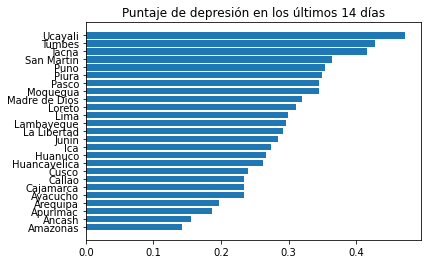

In [ ]:
# Plot depresión últimos 14 días, según región
fig, ax = plt.subplots()
ax.barh(labels_region, sorted(np.array(depresion_14d)))
ax.set_title('Puntaje de depresión en los últimos 14 días')

plt.show()


In [ ]:
## Convertir variables objetivo de object a numeric
DD_BASE_TOTAL["QS704A"]= dd.to_numeric(DD_BASE_TOTAL['QS704A'],errors = 'coerce')
DD_BASE_TOTAL["QS704B"]= dd.to_numeric(DD_BASE_TOTAL['QS704B'],errors = 'coerce')
DD_BASE_TOTAL["QS704C"]= dd.to_numeric(DD_BASE_TOTAL['QS704C'],errors = 'coerce')
DD_BASE_TOTAL["QS704D"]= dd.to_numeric(DD_BASE_TOTAL['QS704D'],errors = 'coerce')
DD_BASE_TOTAL["QS704E"]= dd.to_numeric(DD_BASE_TOTAL['QS704E'],errors = 'coerce')
DD_BASE_TOTAL["QS704F"]= dd.to_numeric(DD_BASE_TOTAL['QS704F'],errors = 'coerce')
DD_BASE_TOTAL["QS704G"]= dd.to_numeric(DD_BASE_TOTAL['QS704G'],errors = 'coerce')
DD_BASE_TOTAL["QS704H"]= dd.to_numeric(DD_BASE_TOTAL['QS704H'],errors = 'coerce')
DD_BASE_TOTAL["QS704I"]= dd.to_numeric(DD_BASE_TOTAL['QS704I'],errors = 'coerce')


In [ ]:
# Calcular puntaje depresión 12 meses
DD_BASE_TOTAL["PUNTAJE_DEPRESION_12M"]= (DD_BASE_TOTAL["QS704A"]+DD_BASE_TOTAL["QS704B"]+DD_BASE_TOTAL["QS704C"]+DD_BASE_TOTAL["QS704D"]+DD_BASE_TOTAL["QS704E"]+DD_BASE_TOTAL["QS704F"]+DD_BASE_TOTAL["QS704G"]+DD_BASE_TOTAL["QS704H"]+DD_BASE_TOTAL["QS704I"])/9

In [ ]:
## Calcular puntajes depresión 12 meses, según regiones del Perú
depresion_12m= DD_BASE_TOTAL.groupby("HV024")["PUNTAJE_DEPRESION_12M"].agg(np.mean).compute()

distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


KilledWorker: ignored

In [ ]:
## Visualizar puntajes depresión 12 meses, según regiones del Perú
print(pd.DataFrame(data= np.array(depresion_12m), index= labels_region, columns= ["Puntaje depresión 12 meses"]))

In [ ]:
# Plot depresión últimos 12 meses, según región
fig, ax = plt.subplots()
ax.barh(labels_region, sorted(np.array(depresion_12m)))
ax.set_title('Puntaje de depresión en los últimos 12 meses')


plt.show()

# **Variables predictoras**

* HV024 -> Región
* HV104 -> Sexo
* HV105 -> Edad
* HV106 -> Nivel de estudios
* HV115 -> Estado civil
* SH11E -> Seguro de salud privado
* HV270 -> índice de riqueza



In [ ]:
#Pre-procesar variables predictoras
DD_BASE_TOTAL["HV024"]= DD_BASE_TOTAL["HV024"].astype('category')
DD_BASE_TOTAL["HV104"]= DD_BASE_TOTAL["HV104"].astype('bool')
DD_BASE_TOTAL["HV106"]= DD_BASE_TOTAL["HV106"].astype('int64')
DD_BASE_TOTAL["HV115"]= DD_BASE_TOTAL["HV115"].astype('category')
DD_BASE_TOTAL["SH11E"]= DD_BASE_TOTAL["SH11E"].astype('bool')
DD_BASE_TOTAL["HV270"]= DD_BASE_TOTAL["HV270"].astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:
## Base Machine Learning (pre-processing)
DD_BASE_ML= DD_BASE_TOTAL[DD_BASE_TOTAL.HV106!=8]
DD_BASE_ML= DD_BASE_ML.loc[:, ["HV024", "HV104", "HV105", "HV106", "HV115", "SH11E", "HV270", "QS700B"]]

In [ ]:
#Explorar NA
DD_BASE_ML.isna().sum().compute()

In [ ]:
## BASE ML
DD_BASE_ML= DD_BASE_ML.dropna()

In [ ]:
#Explorar NA BASE ML FINAL
DD_BASE_ML.isna().sum().compute()

In [ ]:
print(DD_BASE_ML)

# **Algoritmo ML**

In [ ]:
# Transformar variables
X = DD_BASE_ML.drop("QS700B", axis=1)
y = DD_BASE_ML["QS700B"]
names= DD_BASE_ML.drop("QS700B", axis=1).columns

In [ ]:
# Importar librerias
from dask_glm.datasets import make_regression
from dask_ml.model_selection import train_test_split, KFold, GridSearchCV
from dask_ml.linear_model import LinearRegression

In [ ]:
# Crear train y test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= True, test_size= 0.2)

In [ ]:
#create object 5 fold CV
kf= KFold(n_splits= 5, shuffle= True, random_state= 42179)

In [ ]:
# Train lasso model
X_train, y_train = make_regression()
dask_model = LinearRegression(penalty ='l1')
dask_model.fit(X_train, y_train)

In [ ]:
cv_results= cross_val_score(dask_model, X_train, y_train, cv= kf)

In [ ]:
dask_model.score(X_train, y_train)

0.08374257455249734

In [ ]:
# Importar librerias SCIKIT LEARN
from sklearn.datasets import make_classification
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= True, test_size= 0.2)

kf= KFold(n_splits= 5, shuffle= True, random_state= 42179)
param_grid= {"alpha": np.arange(0.0001, 1, 10),
             "solver": ["sag", "lsqr"]}

lasso = Lasso()
lasso_cv= GridSearchCV(lasso, param_grid, cv= kf)
lasso_cv.fit(X_train, y_train)


distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.nanny - WARNING - Restarting worker


In [ ]:
import joblib

with joblib.parallel_backend('dask'):
    grid_search.fit(X, y)

In [ ]:
param_dist = {'alpha': np.logspace(-4, 0, num=1000),
              'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
              'average': [True, False]}

search = HyperbandSearchCV(dask_model, param_dist)
search.fit(X_train, y_train, classes= np.unique(y_train))
search.best_params_

In [ ]:
search = HyperbandSearchCV(est, param_dist)
search.fit(X, y, classes=np.unique(y))
search.best_params_

In [ ]:
lasso_coef= dask_model.fit(X_train, y_train).coef_

In [ ]:
print(lasso_coef)

[-0.0032494   0.00867132  0.          0.00715194 -0.00606711  0.00584019
  0.01232202  0.         -0.00555977 -0.00635953 -0.01021603  0.01545733
 -0.0091621  -0.01307056  0.00361968  0.0013162  -0.00122804  0.00681239
  0.00888654 -0.01527227 -0.00876903  0.         -0.00577431 -0.0064625
 -0.00270253  0.0003248   0.00832833 -0.00299823  0.          0.0047593
  0.          0.00157182 -0.01048705  0.00394361  0.0226951  -0.0028199
 -0.01739167  0.00232689  0.00185492  0.00121736 -0.01916736  0.
 -0.00382598  0.         -0.00593199  0.01449809 -0.00842955  0.00348225
 -0.01941773  0.00231021 -0.00207356 -0.00324682 -0.01035387 -0.00848252
 -0.02014303  0.00219257  0.00472299 -0.00643385  0.         -0.01113669
 -0.00721696  0.00952059 -0.00451396 -0.00230731  0.         -0.00760168
  0.          0.          0.0016159   0.01333439 -0.00266513 -0.01868689
  0.00560024  0.          0.02218286 -0.01584971 -0.00813115 -0.01819666
  0.         -0.00730691 -0.00501397 -0.00649762 -0.00624367 -

In [ ]:
test_score= dask_model.score(X_test, y_test)

In [ ]:
print(names)

In [ ]:
#make prediction
y_pred = dask_model.predict(X_test)

print(y_pred.compute())

In [ ]:

#create instance of model
model= LinearRegression()

#wrap model
dask_model = Incremental(model, scoring= "neg_mean_squared_error")


#fit model to data
for i in range(10):
  dask_model.partial_fit(X_train, y_train)

In [ ]:
lasso= Lasso(alpha= 0.1)
lasso_coef= lasso.fit(X, y).coef_

In [ ]:
## Cambiar nombre a REGIÓN
##DD_BASE_TOTAL["REGION"]= DD_BASE_TOTAL['HV024'].applymap(region)

In [ ]:
DD_BASE_TOTAL.groupby("HV024")["QS700B"].agg(np.mean).compute()

In [ ]:
output1["REGION"]= map(region, output1["HV024"])

In [ ]:
index_region= ["Amazonas", "Ancash", "Apurimac", "Arequipa", "Ayacucho", "Cajamarca", "Callao", "Cusco", "Huancavelica", "Huanuco", "Ica", "Junin", "La Libertad", "Lambayeque", "Lima", "Loreto", "Madre de Dios", "Moquegua", "Pasco", "Piura", "Puno", "San Martin", "Tacna", "Tumbes", "Ucayali"]

In [ ]:
## Función región
def region(x):
  if x == 1:
    print("Amazonas")
  elif x== 2:
    print("Ancash")
  elif x== 3:
    print("Apurimac")
  else:
    print("otro")

In [ ]:
region(99)

**Limpieza de base (revisar)**

In [ ]:
DD_BASE_TOTAL.mean().compute()

In [ ]:
vars_sel= pd.read_csv("Bases/vars_sel.csv")

In [ ]:
vars_sel.columns = map(str.upper, vars_sel.columns)

In [ ]:
vars_sel= vars_sel.columns

In [ ]:
print(vars_sel)

In [ ]:
DD_BASE_FINAL= DD_BASE_TOTAL[vars_sel]

Información sobre cuestionario de salud mental PHQ-9:
- link [PHQ-9](https://www.hiv.uw.edu/page/mental-health-screening/phq-9)
- según puntos de corte puede establecerse depresión severa, moderadamente severa, moderada, leve, mínima/inexistente.
- el puntaje consiste en una suma simple

Bases 2017-2021:
- Las 9 preguntas salud mental son las mismas en los cuestionarios. 
- Las bases deberán ser descargasa en spss y luego pasadas a csv en python para luego ser utilizadas
- DataFrame.to_csv()

In [ ]:
print(DD_BASE_FINAL.compute())


1. Crear QSNUMERO en RECH1 a partir de HVIDX
2. Crear QSNUMERO en RECH4 a partir de IDXH4
3. Unir RECH1 con RECH4 por HHID y QSNUMERO  -> **BASE_INDIVIDUAL**
<br/>

4. Unir RECH0 Y RECH23 por HHID -> **BASE_HOGAR**
<br/>

5. Unir BASE_INDIVIDUAL y BASE_HOGAR por HHID Y QSNUMERO -> **BASE_PREDICTORES**
<br/>

6. Unir BASE CSALUD01 con BASE_PREDICTORES por HHID y QSNUMERO -> **BASE_TOTAL** (34115)

* RECH1-> 140K
* RECH4 -> 140K 
* RECH23 -> 37K
* RECH0-> 37K
* CSALUD-> 34K

- CSALUD01 unir con BASE_INDIVIDUAL por HHID y QSNUMERO ->BASE1 (34115)
- BASE1 con BASE_HOGAR por HHID
